In [42]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(font_scale=.75, style="dark")

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [43]:
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

In [44]:
mnist_df = pd.DataFrame(X)
mnist_df["target"] = y
mnist_df["target"] = mnist_df["target"].astype(int)

In [45]:
mnist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [46]:
X = mnist_df.drop("target", axis=1).to_numpy()
y = mnist_df["target"].to_numpy()

In [47]:
X = X / 255.0  # Normalisera pixlar till [0, 1]

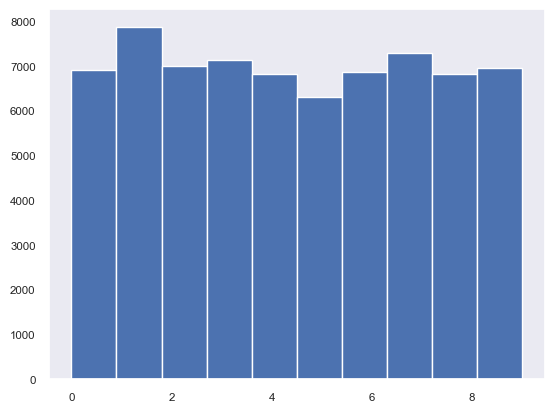

In [48]:
# Fördelning av klasser
plt.hist(y);

In [49]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=69)


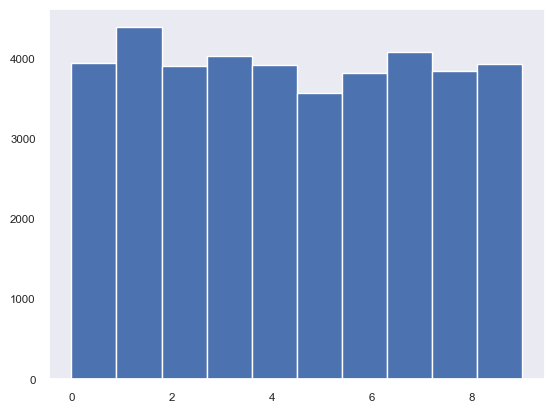

In [50]:
plt.hist(y_train);

In [51]:
X_train.shape

(39375, 784)

In [52]:
X_train[X_train > 0]


array([0.05882353, 0.16862745, 0.1254902 , ..., 0.57647059, 0.30196078,
       0.09411765], shape=(5912287,))

[Text(0.5, 1.0, 'Label: 7')]

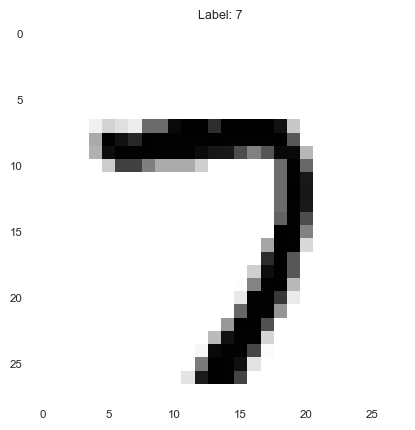

In [53]:
ax = plt.imshow(X_train[0].reshape(28, 28), cmap="binary")
ax.axes.set(title = f"Label: {y_train[0]}")

In [54]:
mnist_wide = pd.DataFrame(X_train)
mnist_wide.insert(0, "instance", mnist_wide.index + 1)
mnist_wide.insert(0, "label", y_train)

mnist_long = pd.melt(mnist_wide, id_vars=["label", "instance"], var_name="pixel")
mnist_long["pixel"] = mnist_long["pixel"].astype(int)

mnist_long["x"] = mnist_long["pixel"] % 28
mnist_long["y"] = (28 - mnist_long["pixel"] // 28) - 1


In [55]:
mnist_long.shape

(30870000, 6)

In [56]:
mnist_long.head()

,label,instance,pixel,value,x,y
0,7,1,0,0.0,0,27
1,5,2,0,0.0,0,27
2,2,3,0,0.0,0,27
3,3,4,0,0.0,0,27
4,8,5,0,0.0,0,27


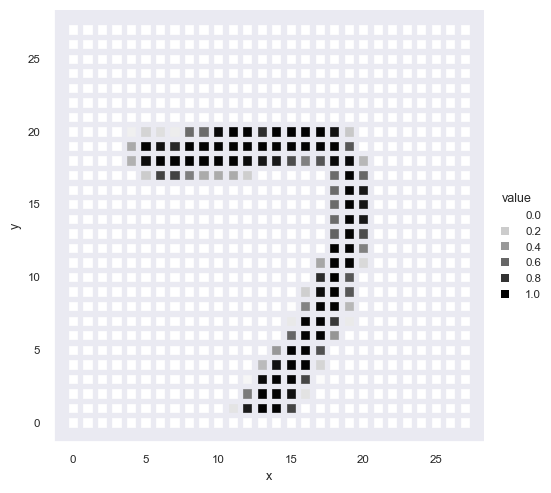

In [57]:
sns.relplot(mnist_long[mnist_long.instance == 1], x="x", y="y", hue="value", palette="binary", marker="s", edgecolor=None)

In [58]:
label_means = mnist_long.groupby(["x", "y", "label"]).agg({"value": "mean"}).reset_index()

In [59]:
label_means[label_means.label == "1"].head()

,x,y,label,value


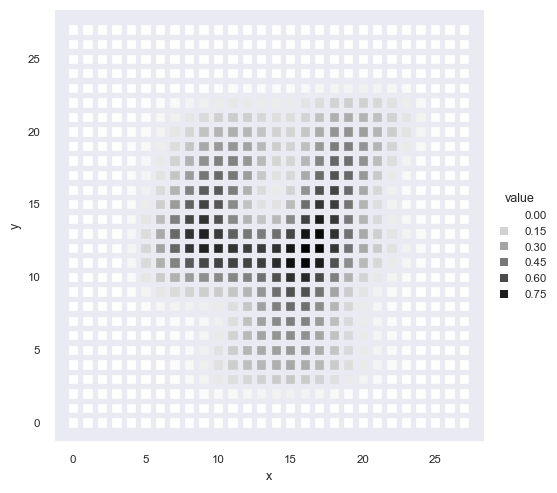

In [62]:
sns.relplot(label_means[label_means.label == 4], x="x", y="y", hue="value", palette="binary", marker="s", edgecolor=None)

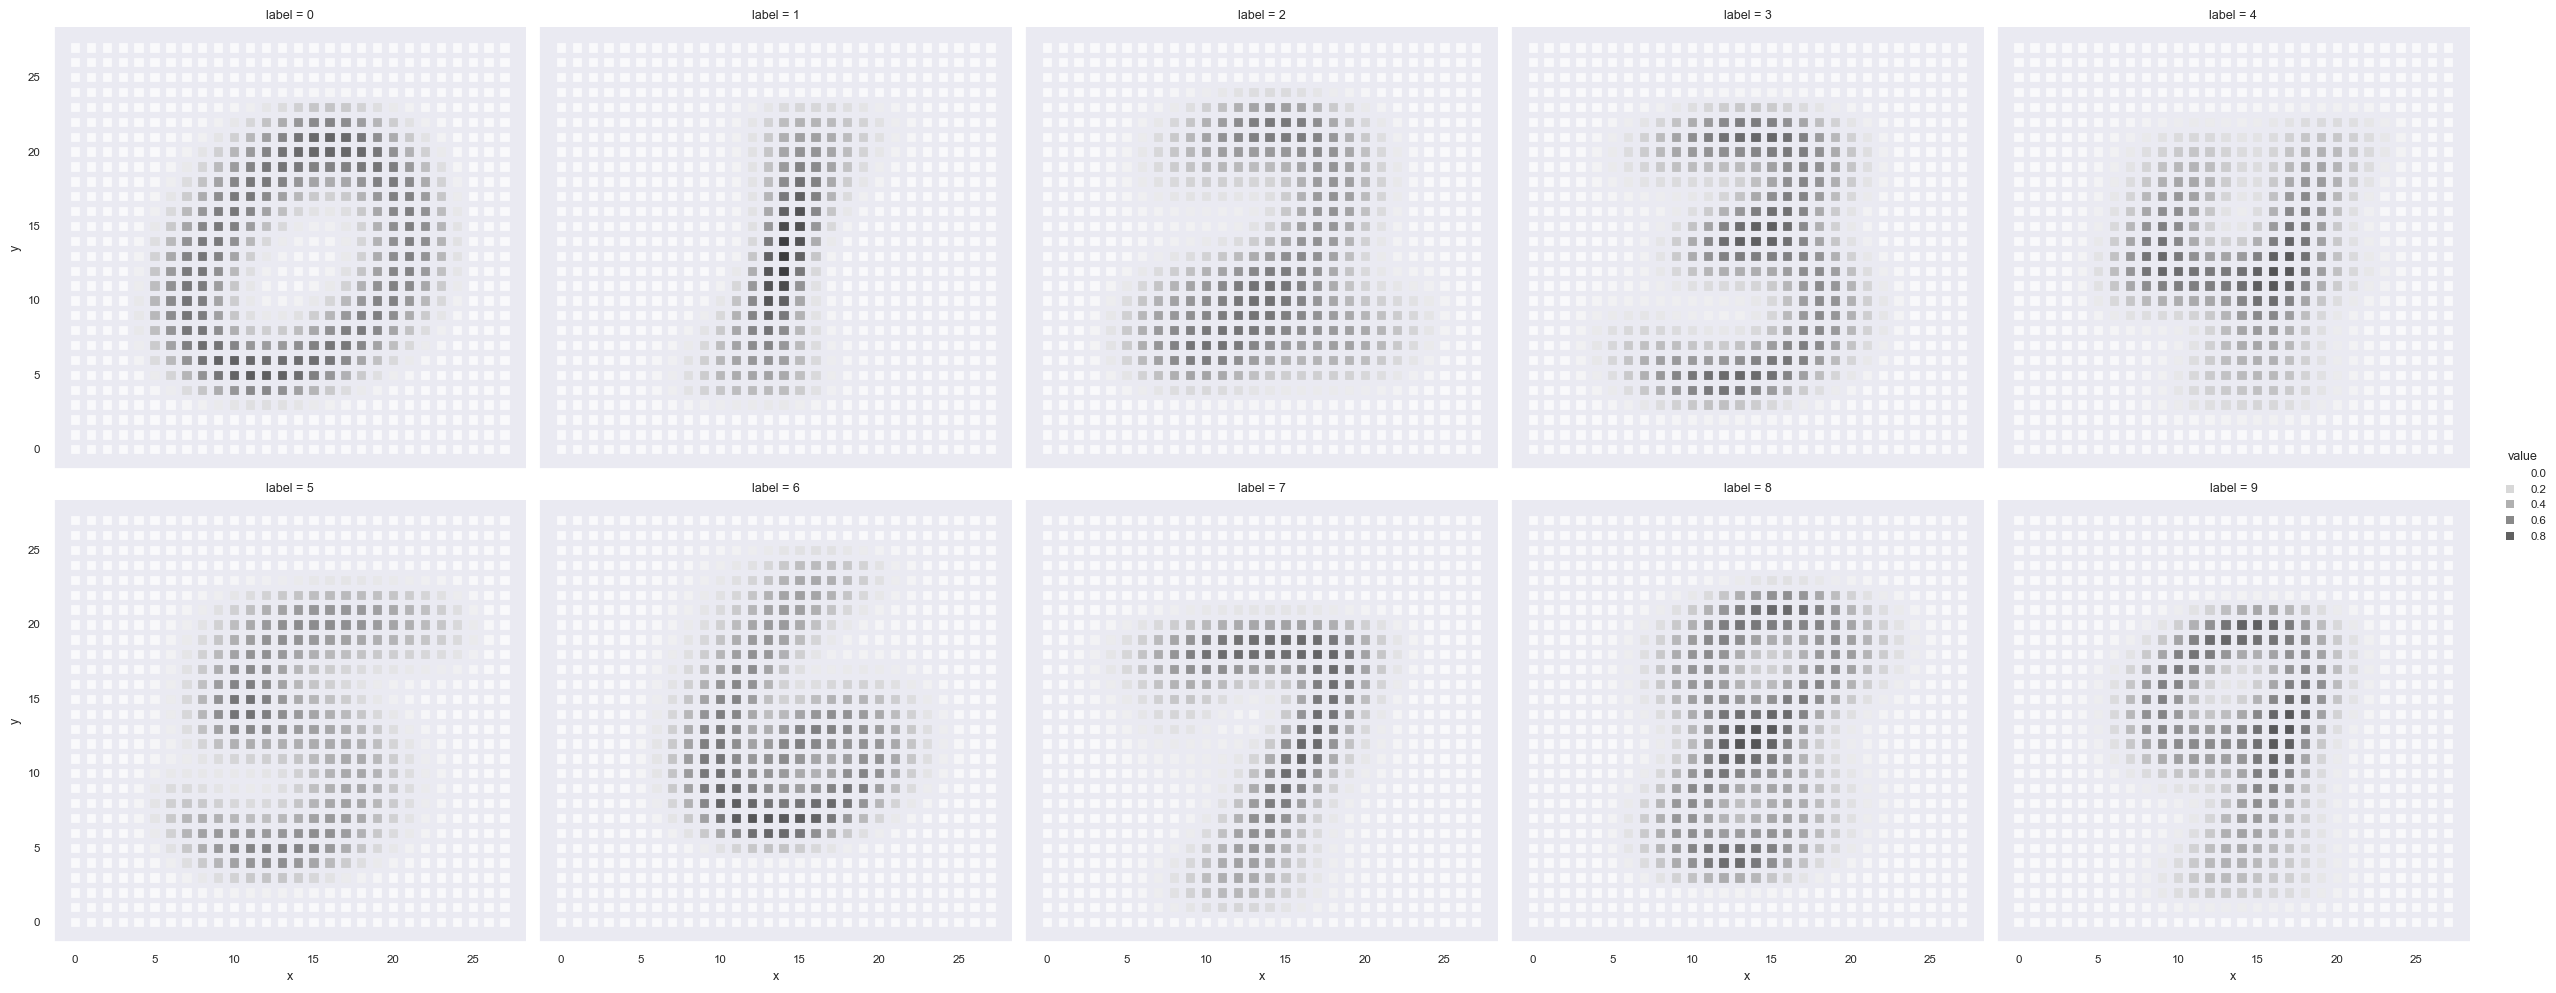

In [63]:
sns.relplot(label_means, x="x", y="y", hue="value", col="label", kind="scatter", col_wrap=5, palette="binary", alpha=.75, edgecolor=None, marker="s")

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

In [65]:
def display_confusion_matrix(y_true, y_pred):
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot(values_format="d")

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [67]:
logreg = LogisticRegression()
svc = SVC(C=10, probability=True)

In [68]:
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
y_pred = logreg.predict(X_val)

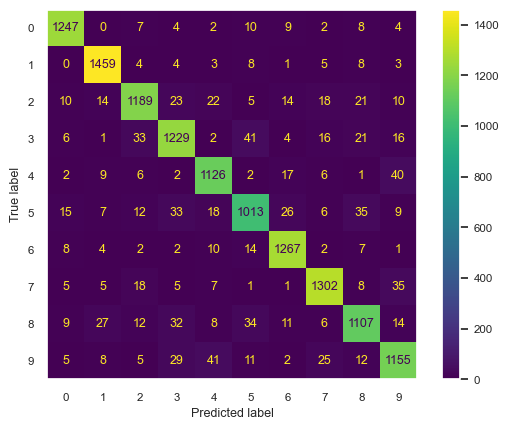

In [70]:
display_confusion_matrix(y_val, y_pred)

In [71]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1293
           1       0.95      0.98      0.96      1495
           2       0.92      0.90      0.91      1326
           3       0.90      0.90      0.90      1369
           4       0.91      0.93      0.92      1211
           5       0.89      0.86      0.88      1174
           6       0.94      0.96      0.95      1317
           7       0.94      0.94      0.94      1387
           8       0.90      0.88      0.89      1260
           9       0.90      0.89      0.90      1293

    accuracy                           0.92     13125
   macro avg       0.92      0.92      0.92     13125
weighted avg       0.92      0.92      0.92     13125



In [72]:
y_prob = logreg.predict_proba(X_val)
roc_auc_score(y_val, y_prob, multi_class="ovr")

0.9924873609837181

In [73]:
svc.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [74]:
y_pred = svc.predict(X_val)

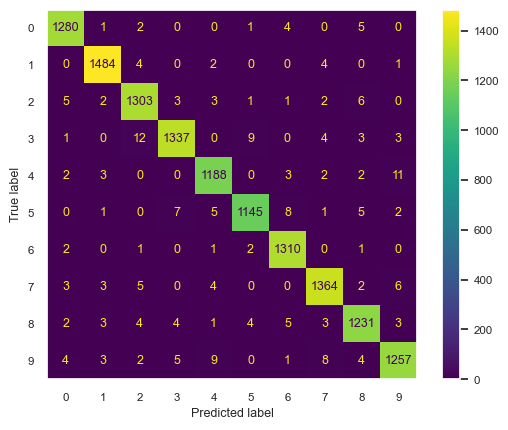

In [75]:
display_confusion_matrix(y_val, y_pred)

In [76]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1293
           1       0.99      0.99      0.99      1495
           2       0.98      0.98      0.98      1326
           3       0.99      0.98      0.98      1369
           4       0.98      0.98      0.98      1211
           5       0.99      0.98      0.98      1174
           6       0.98      0.99      0.99      1317
           7       0.98      0.98      0.98      1387
           8       0.98      0.98      0.98      1260
           9       0.98      0.97      0.98      1293

    accuracy                           0.98     13125
   macro avg       0.98      0.98      0.98     13125
weighted avg       0.98      0.98      0.98     13125



In [77]:
y_prob = svc.predict_proba(X_val)
roc_auc_score(y_val, y_prob, multi_class="ovr")

0.999752000175134

In [78]:
svc.fit(X_train_val, y_train_val)

y_pred = svc.predict(X_test)


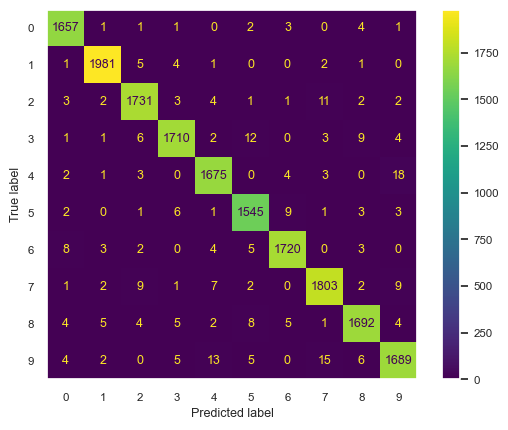

In [79]:
display_confusion_matrix(y_test, y_pred)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1670
           1       0.99      0.99      0.99      1995
           2       0.98      0.98      0.98      1760
           3       0.99      0.98      0.98      1748
           4       0.98      0.98      0.98      1706
           5       0.98      0.98      0.98      1571
           6       0.99      0.99      0.99      1745
           7       0.98      0.98      0.98      1836
           8       0.98      0.98      0.98      1730
           9       0.98      0.97      0.97      1739

    accuracy                           0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [81]:
svc.fit(X, y)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [174]:
from skimage.color import rgb2gray, rgba2rgb
from skimage.filters import threshold_otsu
from skimage.transform import resize, rotate
from skimage.util import invert
from skimage.io import imread

In [343]:
img = imread("ny_9.jpg")

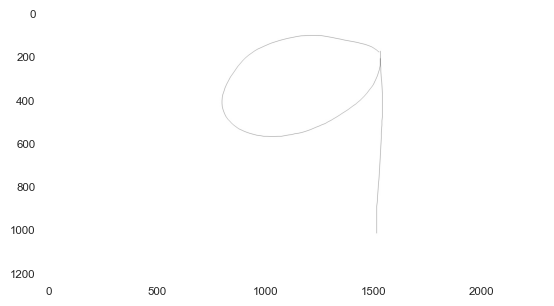

In [344]:
plt.imshow(img)

In [345]:
if img.ndim == 3 and img.shape[-1] == 4:
    img = rgba2rgb(img)
img = rgb2gray(img)    

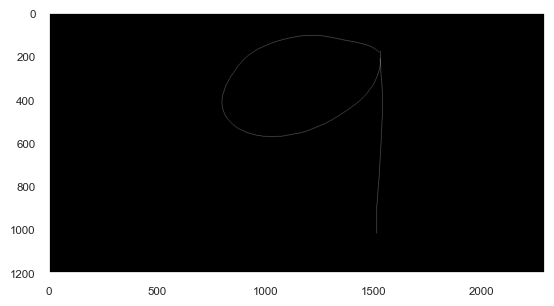

In [346]:
plt.imshow(img, cmap="binary")

In [347]:
img = invert(img)

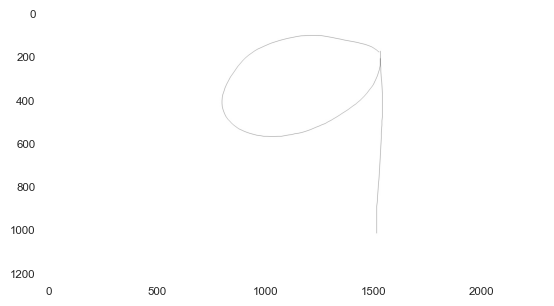

In [348]:
plt.imshow(img, cmap="binary")

In [349]:
img = resize(img, (28, 28))

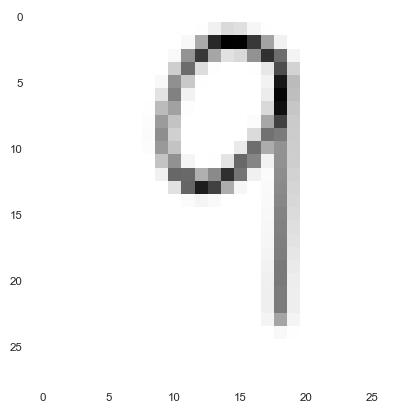

In [350]:
plt.imshow(img, cmap="binary")

In [351]:
img = (img > threshold_otsu(img))

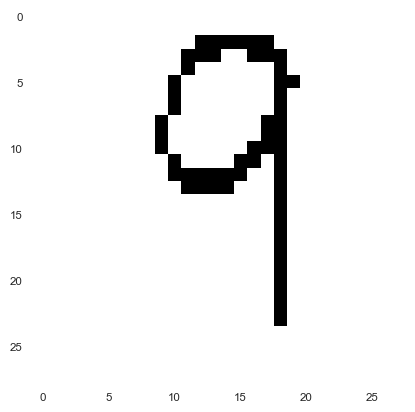

In [352]:
plt.imshow(img, cmap="binary")

In [353]:
svc.predict(img.reshape(1, -1))

array([3])

In [354]:
def preprocess_image(img: np.ndarray):
    img = rgb2gray(img)
    img = invert(img)
    img = resize(img, (28, 28))
    img = (img > threshold_otsu(img))
    return img


In [355]:
import os
images = [f for f in os.listdir("C:\\Users\\hultb\\Skola\\AI_teori_och_tillampning_del_1\\Kursvecka_3\\Lektion_2") if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
images

['ny_0.jpg',
 'ny_1.jpg',
 'ny_2.jpg',
 'ny_3.jpg',
 'ny_4.jpg',
 'ny_5.jpg',
 'ny_6.jpg',
 'ny_7.jpg',
 'ny_8.jpg',
 'ny_9.jpg']

In [356]:
X_new = np.zeros((len(images), 784))

for i, file in enumerate(images):
    img = imread("C:\\Users\\hultb\\Skola\\AI_teori_och_tillampning_del_1\\Kursvecka_3\\Lektion_2" + "\\" + file)
    if img.ndim == 3 and img.shape[-1] == 4:
        img = rgba2rgb(img)
    processed = preprocess_image(img)
    X_new[i] = processed.reshape(1, -1)


In [357]:
X_new.shape

(10, 784)

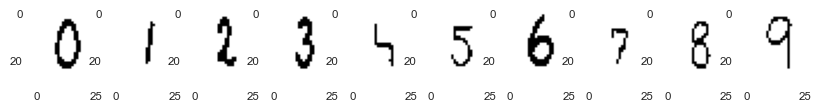

In [358]:
_, axs = plt.subplots(1, 10, figsize=(10, 4))
for ax, img in zip(axs, X_new):
    ax.imshow(img.reshape(28, 28), cmap='binary')


In [359]:
svc.predict(X_new)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 3])